In [ ]:
# HW4 Problem 2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [25]:
file_path = 'E:/UNCC/UNCC ML/Housing.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [27]:
# Converting the strings to values

list1 =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
list2 = ['furnishingstatus']

# Defining the map function
def map1(x):
    return x.map({'yes': 1, 'no': 0})

def map2(x):
    return x.map({'furnished': 1, 'semi-furnished': 0})
    
sample[list1] = sample[list1].apply(map1)
sample[list2] = sample[list2].apply(map2)

sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0


In [29]:
X = sample.iloc[:, 1:12].values
Y = sample.iloc[:, 0].values

In [31]:
# Standardization of the featues

scale = StandardScaler()
X = scale.fit_transform(X)

In [33]:
# To plot then in two dimentional plane features were extracted to only on feature.

pca = PCA(n_components=1)
principalNP = pca.fit_transform(X)

In [35]:
finalNP = np.column_stack((X, Y))

In [37]:
# Separation of Test and Training Set

x_train, x_test, y_train, y_test = train_test_split(principalNP, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [39]:
# Running all the models
reg = LinearRegression()
y_reg = reg.fit(x_train, y_train).predict(x_test)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

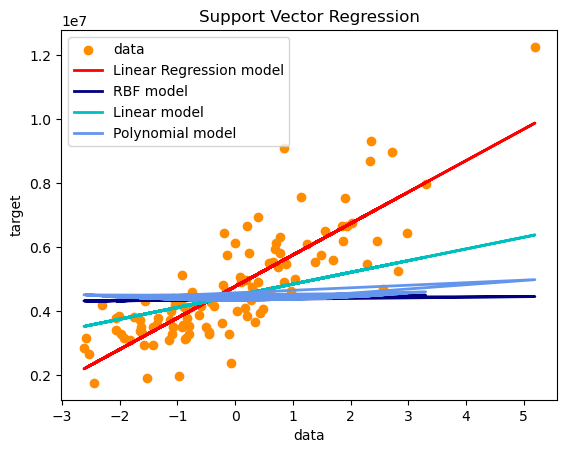

In [41]:
# Plotting the fit lines

lw = 2
plt.scatter(x_test, y_test, color='darkorange', label='data')
plt.plot(x_test, y_reg, color='r', lw=lw, label='Linear Regression model')
plt.plot(x_test, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(x_test, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x_test, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [43]:
from sklearn import metrics


R2_reg = []
R2_lin = []
R2_rbf = []
R2_poly = []

# Kernel = Linear

for i in range(1,12):
    pca = PCA(n_components=i)
    principalNP = pca.fit_transform(X)
    #principalDf = pd.DataFrame(data = principalComponents)
    print(i)
    #print(principalDf.head())
    #print('')
    finalNP = np.column_stack((principalNP, Y))
    x_train, x_test, y_train, y_test = train_test_split(principalNP, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
    
    reg = LinearRegression()
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)

    y_reg = reg.fit(x_train, y_train).predict(x_test)
    y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
    y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
    y_poly = svr_poly.fit(x_train, y_train).predict(x_test)
    
    R2_reg.append(r2_score(y_test, y_reg))
    R2_lin.append(r2_score(y_test, y_rbf))
    R2_rbf.append(r2_score(y_test, y_lin))
    R2_poly.append(r2_score(y_test, y_poly))

    print("R2_reg: %%", R2_reg)
    print("R2_lin: %%", R2_lin)
    print("R2_rbf: %%", R2_rbf)
    print("R2_poly: %%", R2_poly)
    print('')

1
R2_reg: %% [0.6558404805167062]
R2_lin: %% [0.013495124682247006]
R2_rbf: %% [0.38773564670834293]
R2_poly: %% [-0.00027492564010644926]

2
R2_reg: %% [0.6558404805167062, 0.6577300534481084]
R2_lin: %% [0.013495124682247006, 0.0006348106619318283]
R2_rbf: %% [0.38773564670834293, 0.38294071114409]
R2_poly: %% [-0.00027492564010644926, 0.002797177226233738]

3
R2_reg: %% [0.6558404805167062, 0.6577300534481084, 0.6649762458493509]
R2_lin: %% [0.013495124682247006, 0.0006348106619318283, -0.005925081538857624]
R2_rbf: %% [0.38773564670834293, 0.38294071114409, 0.37525662713919083]
R2_poly: %% [-0.00027492564010644926, 0.002797177226233738, -0.011432943033513387]

4
R2_reg: %% [0.6558404805167062, 0.6577300534481084, 0.6649762458493509, 0.6657121016106193]
R2_lin: %% [0.013495124682247006, 0.0006348106619318283, -0.005925081538857624, -0.008763523152953034]
R2_rbf: %% [0.38773564670834293, 0.38294071114409, 0.37525662713919083, 0.375165232005616]
R2_poly: %% [-0.00027492564010644926, 0

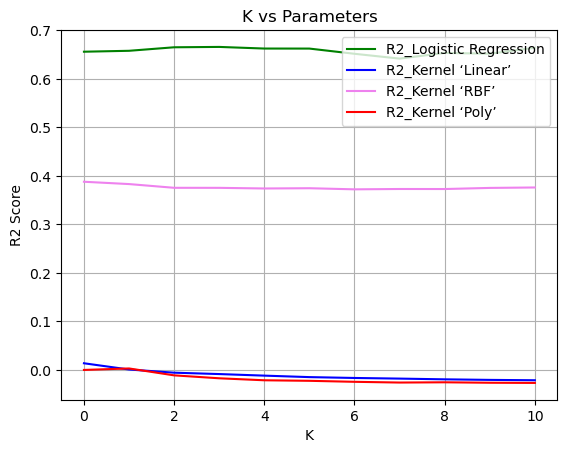

In [45]:
# Plotting the k vs Parameters
# Line plot for the linear regression model 
plt.plot(R2_reg, color='green', label='R2_Logistic Regression')  
plt.plot(R2_lin, color='blue', label='R2_Kernel ‘Linear’') 
plt.plot(R2_rbf, color='violet', label='R2_Kernel ‘RBF’') 
plt.plot(R2_poly, color='red', label='R2_Kernel ‘Poly’') 
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('K') 
plt.ylabel('R2 Score') 
plt.title('K vs Parameters') 
plt.legend() 
plt.show() 